# Sales Forecasting and Optimization

This project aims to predict future sales for a retail or e-commerce business by using historical sales data.

Data set: Time-series retail dataset, contains daily records for multiple products across different store for Corporacion Favorita supermarket chain.

This notebook aims to make exploratory data analysis (EDA) to : o Understand trends, seasonality, and missing values in the dataset. o Generate summary statistics, check for outliers, and identify key patterns and correlations.

In [27]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
# read csv file, parse the date column as datetime
dataset = pd.read_csv("train_sample.csv", parse_dates=['date'])
dataset.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,day,month,dayofweek,family,city,state,type
0,0,2013-01-01,21,3,7.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B
1,1,2013-01-01,21,4,1.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B
2,2,2013-01-01,21,5,2.0,0,1,1,1,CLEANING,Santo Domingo,Santo Domingo de los Tsachilas,B
3,3,2013-01-01,21,12,1.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B
4,4,2013-01-01,21,15,1.0,0,1,1,1,BREAD/BAKERY,Santo Domingo,Santo Domingo de los Tsachilas,B


In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 13 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   item_nbr     int64         
 4   unit_sales   float64       
 5   onpromotion  int64         
 6   day          int64         
 7   month        int64         
 8   dayofweek    int64         
 9   family       object        
 10  city         object        
 11  state        object        
 12  type         object        
dtypes: datetime64[ns](1), float64(1), int64(7), object(4)
memory usage: 198.4+ MB


In [30]:
# check for missing values
missing_values_count = dataset.isnull().sum()
print(missing_values_count)

id             0
date           0
store_nbr      0
item_nbr       0
unit_sales     0
onpromotion    0
day            0
month          0
dayofweek      0
family         0
city           0
state          0
type           0
dtype: int64


* There is no missing values in the dataset

In [31]:
# check for duplicates
duplicates_count = dataset.duplicated().sum()
print(duplicates_count)

0


* There is no duplicates in the dataset

# 2) Univariate Analysis

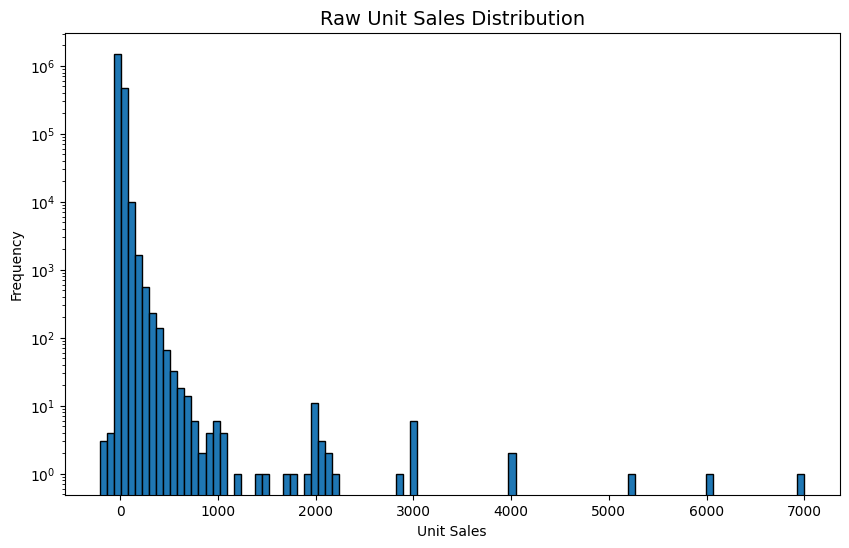

Raw Unit Sales Summary:
count    2.000000e+06
mean     8.551026e+00
std      1.965433e+01
min     -2.070000e+02
25%      2.000000e+00
50%      4.000000e+00
75%      9.000000e+00
max      7.001000e+03
Name: unit_sales, dtype: float64


In [32]:
# ===============================
# Sales Distribution - Raw Distribution
# ===============================
# import necessary libraries
import numpy as np
import seaborn as sns
# Plot raw unit_sales distribution to inspect skewness and spread
plt.figure(figsize=(10,6))
plt.hist(dataset['unit_sales'], bins=100, edgecolor='black')
plt.title("Raw Unit Sales Distribution", fontsize=14)
plt.xlabel("Unit Sales")
plt.ylabel("Frequency")
plt.yscale("log")  # use log scale to better visualize skewness and long tail
plt.show()

# Summary statistics
print("Raw Unit Sales Summary:")
print(dataset['unit_sales'].describe())


c:\Users\fxrxh\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\fxrxh\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


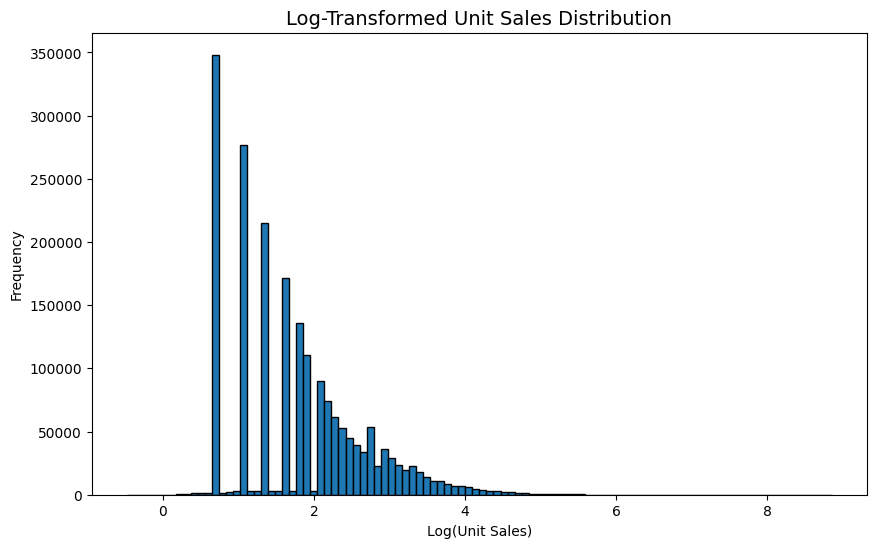

Log-Transformed Unit Sales Summary:
count    1.999873e+06
mean     1.783562e+00
std      8.704122e-01
min     -4.732088e-01
25%      1.098612e+00
50%      1.609438e+00
75%      2.302585e+00
max      8.853951e+00
Name: unit_sales_log, dtype: float64


In [33]:
# ===============================
# Sales Distribution - Log Transformation
# ===============================

# Feature engineering: log transform to reduce skewness
dataset['unit_sales_log'] = np.log1p(dataset['unit_sales'])  # log10() = log(1+x) to handle 0 values

# Check for finite values (log transform can fail with negatives)
finite_unit_sales_log = dataset['unit_sales_log'][np.isfinite(dataset['unit_sales_log'])]

# Plot log-transformed distribution
plt.figure(figsize=(10,6))
plt.hist(finite_unit_sales_log, bins=100, edgecolor='black')
plt.title("Log-Transformed Unit Sales Distribution", fontsize=14)
plt.xlabel("Log(Unit Sales)")
plt.ylabel("Frequency")
plt.show()

# Summary statistics
print("Log-Transformed Unit Sales Summary:")
print(finite_unit_sales_log.describe())


* Raw sales are highly skewed, with many small values and few very large ones.

* Log transformation stabilizes variance and reduces skewness, making the data more suitable for modeling.

Number of Outliers: 187876
Max Unit Sales: 7001.0


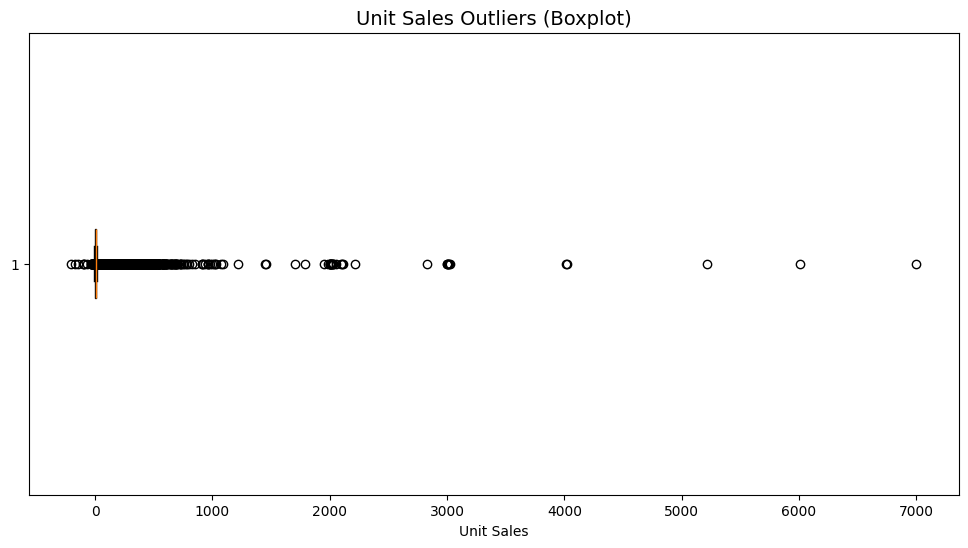

In [34]:
# ===============================
# Outlier Detection (Unit Sales)
# ===============================

# 1. Calculate IQR
Q1 = dataset['unit_sales'].quantile(0.25)
Q3 = dataset['unit_sales'].quantile(0.75)
IQR = Q3 - Q1

# 2. Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Filter outliers
outliers = dataset[(dataset['unit_sales'] < lower_bound) | (dataset['unit_sales'] > upper_bound)]

print("Number of Outliers:", outliers.shape[0])
print("Max Unit Sales:", dataset['unit_sales'].max())

# 4. Visualize outliers using a boxplot
plt.figure(figsize=(12,6))
plt.boxplot(dataset['unit_sales'], vert=False, patch_artist=True)
plt.title("Unit Sales Outliers (Boxplot)", fontsize=14)
plt.xlabel("Unit Sales")
plt.show()


Business Note: Outliers or extreme unit_sales values Should not be automatically removed; likely real events, they may indicates promotional/holiday effects.

Number of Returns/Refunds: 130
Minimum Unit Sales Value: -207.0

Sample of Returns/Refunds:
          id       date  store_nbr  item_nbr  unit_sales  onpromotion  day  \
10655  10655 2013-01-02          9       507        -3.0            1    2   
46867  46867 2013-01-03          4       644        -1.0            1    3   
50970  50970 2013-01-03          8       397        -3.0            0    3   
71807  71807 2013-01-03         35       996       -19.0            0    3   
71992  71992 2013-01-03         35      1361       -27.0            1    3   

       month  dayofweek     family    city      state type  unit_sales_log  
10655      1          2  HOME CARE   Quito  Pichincha    B             NaN  
46867      1          3      DAIRY   Quito  Pichincha    D            -inf  
50970      1          3  GROCERY I   Quito  Pichincha    D             NaN  
71807      1          3       DELI  Playas     Guayas    C             NaN  
71992      1          3   CLEANING  Playas     Guayas 

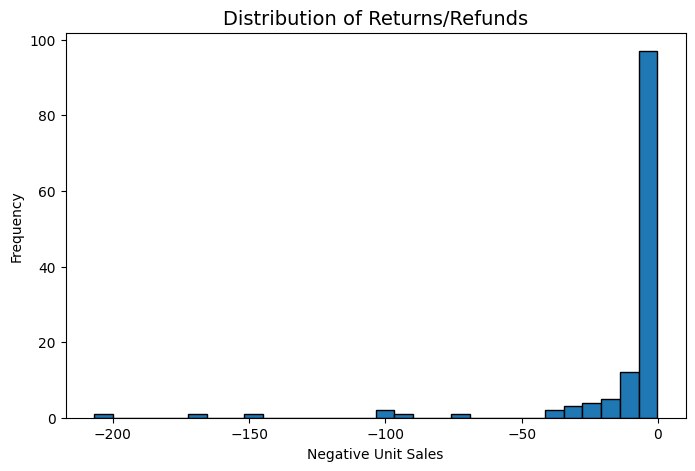

In [35]:
# ===============================
# Returns/Refunds Analysis (Negative Sales)
# ===============================

# Detect negative sales values (refunds/returns)
returns = dataset[dataset['unit_sales'] < 0]

print("Number of Returns/Refunds:", returns.shape[0])
print("Minimum Unit Sales Value:", dataset['unit_sales'].min())
print("\nSample of Returns/Refunds:")
print(returns.head())

# Plot histogram for returns if any exist
if not returns.empty:
    plt.figure(figsize=(8,5))
    plt.hist(returns['unit_sales'], bins=30, edgecolor='black')
    plt.title("Distribution of Returns/Refunds", fontsize=14)
    plt.xlabel("Negative Unit Sales")
    plt.ylabel("Frequency")
    plt.show()


Negative sales (returns/refunds) exist → should be treated separately during preprocessing, May be engineered into a separate feature as they have importance that may influence our predictions

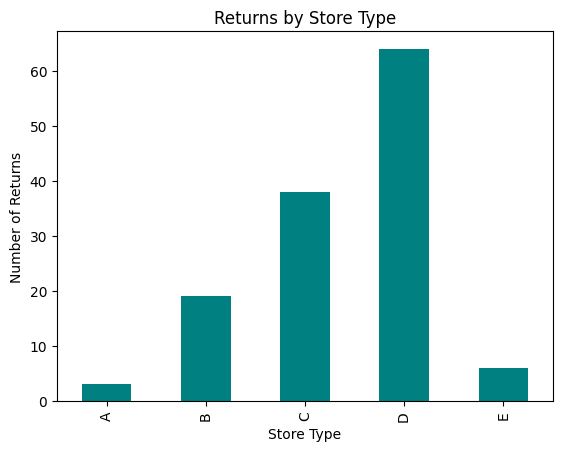

In [36]:
returns_by_type = returns.groupby('type')['unit_sales'].count()
returns_by_type.plot(kind='bar', color='teal')
plt.title("Returns by Store Type")
plt.xlabel("Store Type")
plt.ylabel("Number of Returns")
plt.show()


Store-type analysis suggests that `Type [D]` stores handle significantly more returns, potentially linked to store size or policies

* Promotion vs Return/refund rate

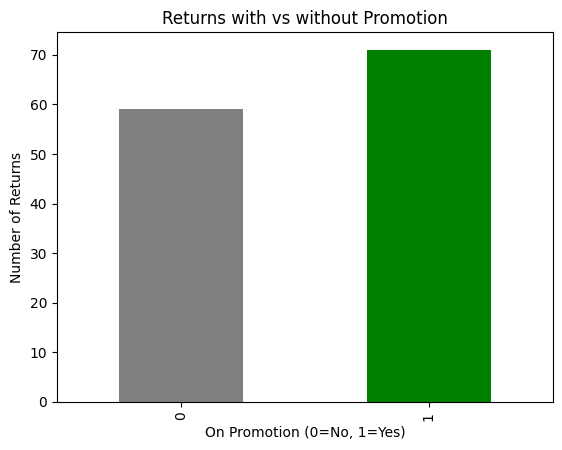

In [37]:
promo_returns = returns.groupby('onpromotion')['unit_sales'].count()
promo_returns.plot(kind='bar', color=['gray','green'])
plt.title("Returns with vs without Promotion")
plt.xlabel("On Promotion (0=No, 1=Yes)")
plt.ylabel("Number of Returns")
plt.show()

Promotional items have a higher return rate, highlighting possible quality concerns or impulse-buying effects. "سلوك شراء متهور."

# 3) Time Series Exploration

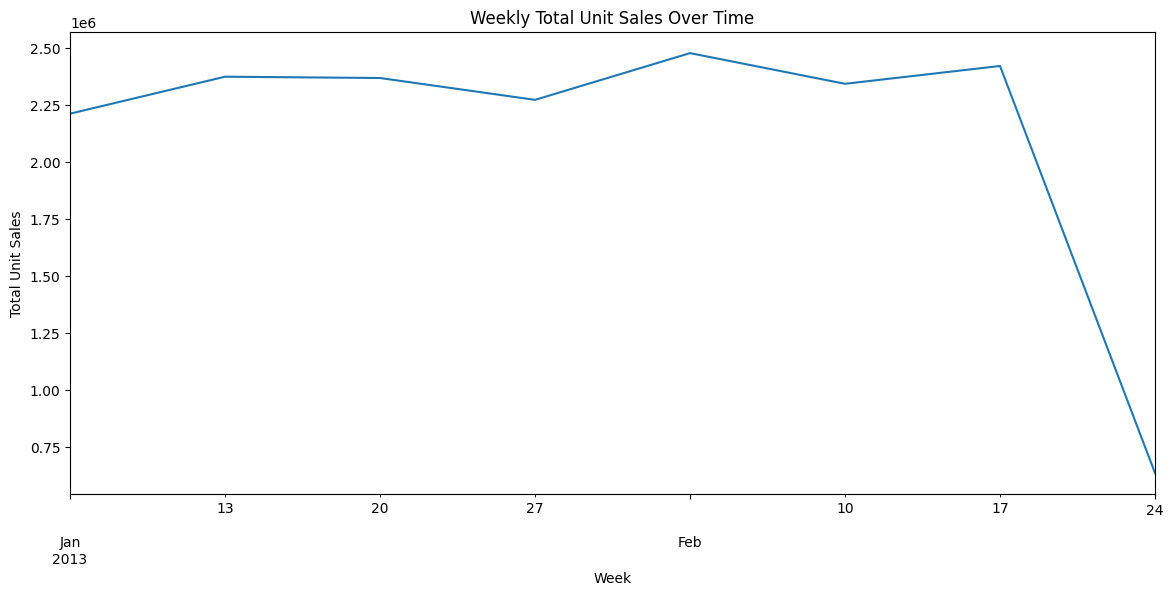

In [38]:
# Removes daily noise and shows weekly patterns.
weekly_sales = dataset.groupby(dataset['date'].dt.to_period("W"))['unit_sales'].sum()

plt.figure(figsize=(14,6))
weekly_sales.plot()
plt.title("Weekly Total Unit Sales Over Time")
plt.xlabel("Week")
plt.ylabel("Total Unit Sales")
plt.show()


- **Weekly Aggregation:**  
  Aggregating sales by week smooths out daily noise and reveals clearer weekly patterns and trends. This highlights recurring patterns such as weekend spikes.

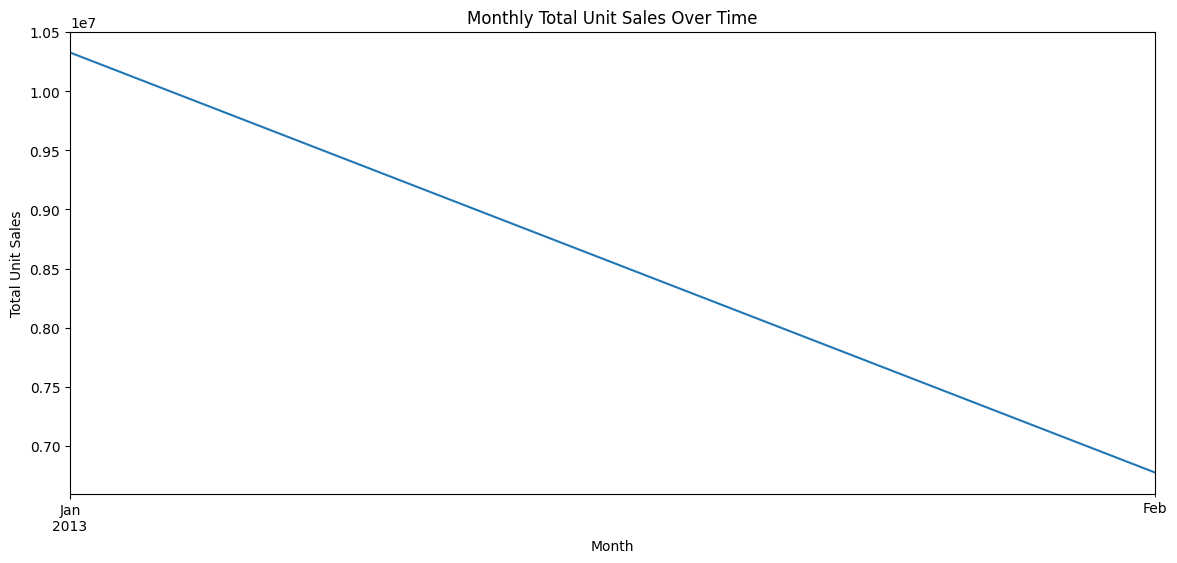

In [39]:
# Reveals seasonal trends and month-to-month patterns.
monthly_sales = dataset.groupby(dataset['date'].dt.to_period("M"))['unit_sales'].sum()

plt.figure(figsize=(14,6))
monthly_sales.plot()
plt.title("Monthly Total Unit Sales Over Time")
plt.xlabel("Month")
plt.ylabel("Total Unit Sales")
plt.show()


- **Monthly Aggregation:**  
  The monthly sales plot highlights broader seasonal trends and month-to-month changes. This is valuable for identifying seasonality, long-term growth or decline, and planning at a strategic level.

# 5) Store & Regional Analysis

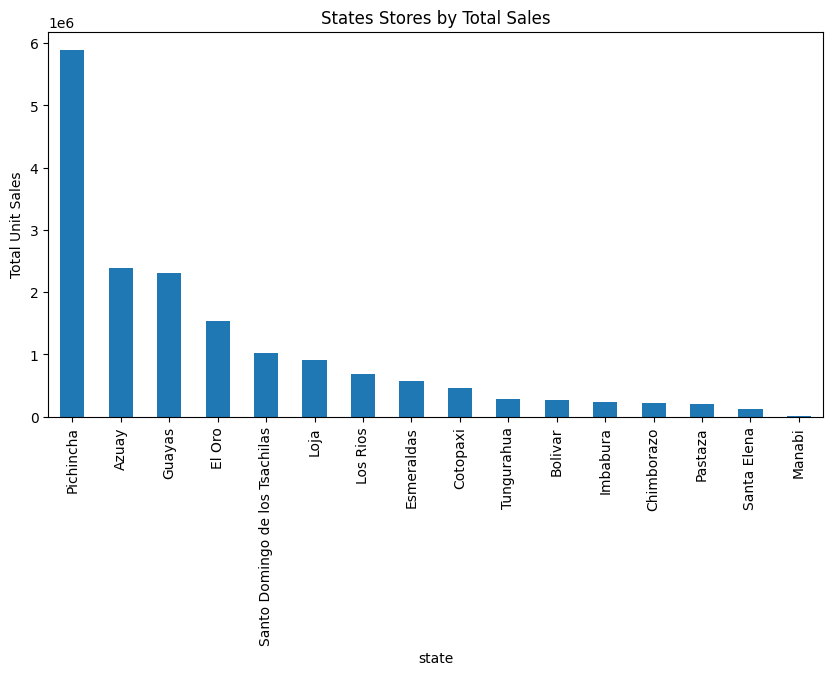

In [40]:
# ===============================
# Store Counts -> Which state stores dominate sales?
# ===============================

store_sales = dataset.groupby("state")["unit_sales"].sum().sort_values(ascending=False)
store_sales.plot(kind="bar", figsize=(10, 5))
plt.title("States Stores by Total Sales")
plt.ylabel("Total Unit Sales")
plt.show()

- **Regional Analysis:** Sales are highly concentrated in a few states, especially Pichincha. state is a strong predictor of sales and should be included as a feature.

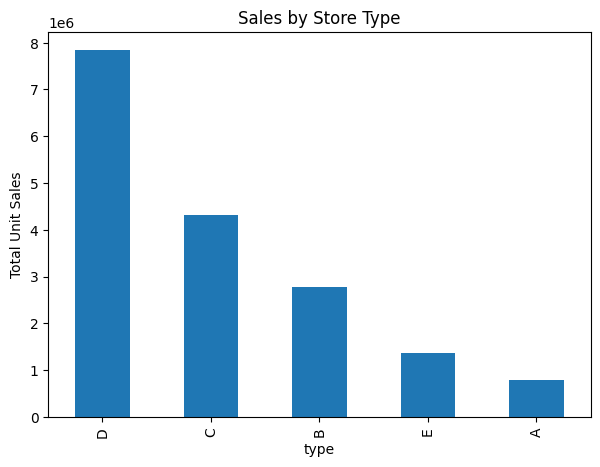

In [41]:
#  Store Counts -> Which store types dominate sales?
type_sales = dataset.groupby("type")["unit_sales"].sum().sort_values(ascending=False)
type_sales.plot(kind="bar", figsize=(7,5))
plt.title("Sales by Store Type")
plt.ylabel("Total Unit Sales")
plt.show()

- **Store Type Analysis:** Store type `[D]` has the highest total sales, but this may be due to more stores or larger stores. Normalize by store count for fair comparison. Further analysis (e.g., regression) is needed to isolate the effect of store type from other factors (location, promotions).


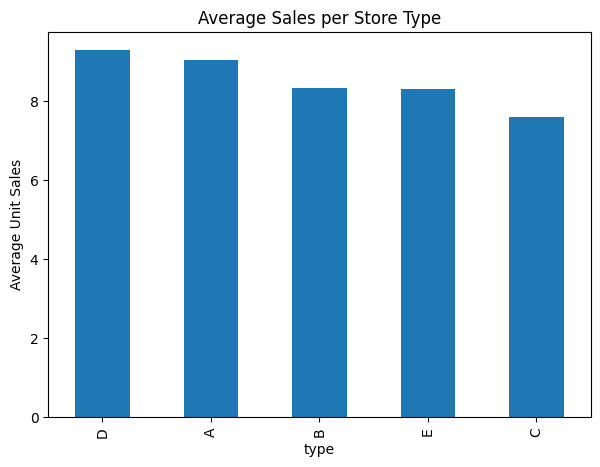

In [42]:
# To see if type “A” dominates because it has more stores, or because each A store sells more on average:
type_avg_sales = dataset.groupby("type")["unit_sales"].mean().sort_values(ascending=False)
type_avg_sales.plot(kind="bar", figsize=(7,5))
plt.title("Average Sales per Store Type")
plt.ylabel("Average Unit Sales")
plt.show()


Avoid assuming that total sales dominance is only due to store count; average sales per store provides a more nuanced view of store type performance.


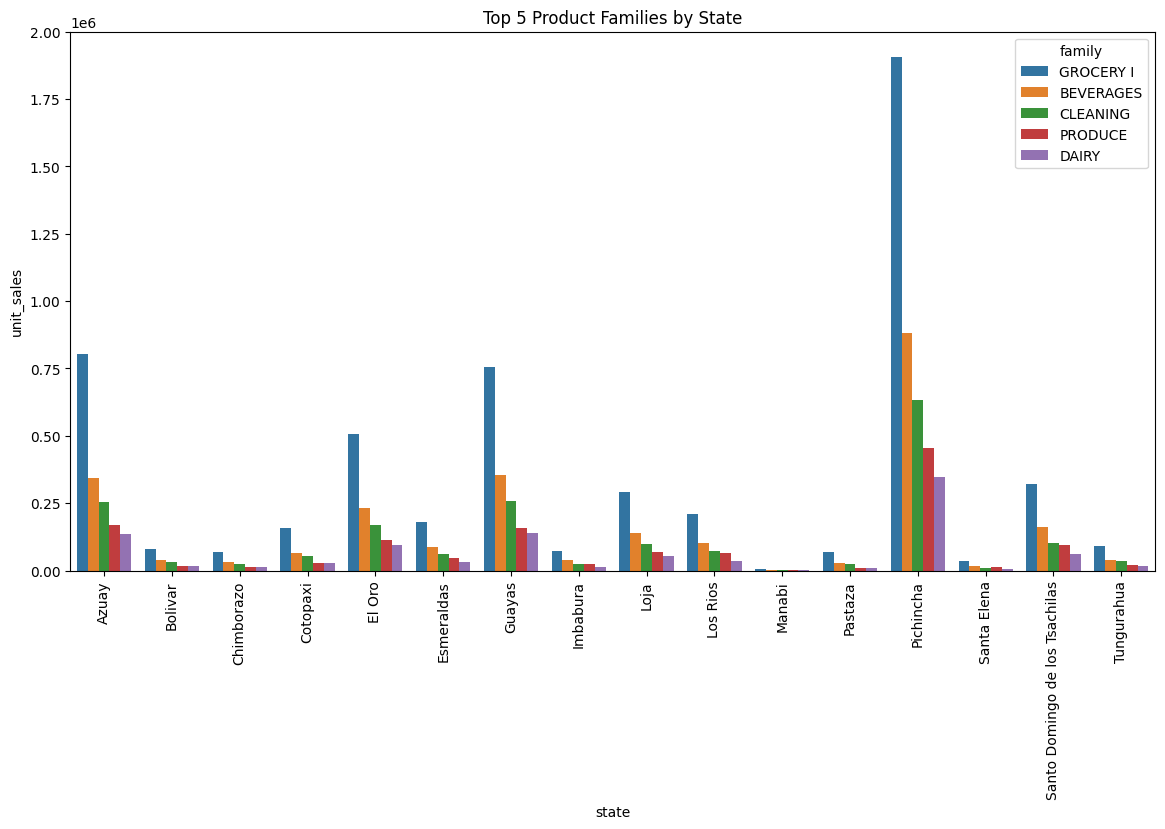

In [43]:
# Store–Item Interactions (Regional Bestsellers)

# Top 5 families per state
top_families_state = (
    dataset.groupby(["state", "family"])["unit_sales"].sum()
    .reset_index()
    .sort_values(["state","unit_sales"], ascending=[True, False])
)

# Select top 5 families for each state
top_families_state = top_families_state.groupby("state").head(5)

import seaborn as sns
plt.figure(figsize=(14,7))
sns.barplot(data=top_families_state, x="state", y="unit_sales", hue="family")
plt.title("Top 5 Product Families by State")
plt.xticks(rotation=90)
plt.show()


**regional preferences:** For each state, find the top 5 bestselling product families.

#  6) Correlations & Relationships

In [44]:
# Step 1 — Create Lagged Sales Columns

# Aggregate daily total sales
daily_sales = dataset.groupby('date')['unit_sales'].sum()

# Create lagged sales columns
daily_sales_df = daily_sales.to_frame(name="unit_sales")
daily_sales_df['lag_7'] = daily_sales_df['unit_sales'].shift(7)
daily_sales_df['lag_14'] = daily_sales_df['unit_sales'].shift(14)
daily_sales_df['lag_30'] = daily_sales_df['unit_sales'].shift(30)

daily_sales_df.head(15)
# Note: The NaN values in the first rows of the lag_7, lag_14, and lag_30 columns are expected and correct. This happens because:
#  For the first 6 days, there is no data from 7 days ago, so the value is NaN. Similarly, lag_14 and lag_30 will be NaN for the first 13 and 29 days,

,unit_sales,lag_7,lag_14,lag_30
date,,,,
2013-01-01,2511.619,NaN,NaN,NaN
2013-01-02,496092.418,NaN,NaN,NaN
2013-01-03,361429.231,NaN,NaN,NaN
2013-01-04,354459.677,NaN,NaN,NaN
2013-01-05,477350.121,NaN,NaN,NaN
2013-01-06,519695.401,NaN,NaN,NaN
2013-01-07,336122.801,NaN,NaN,NaN
2013-01-08,318347.778,2511.619,NaN,NaN
2013-01-09,302530.809,496092.418,NaN,NaN


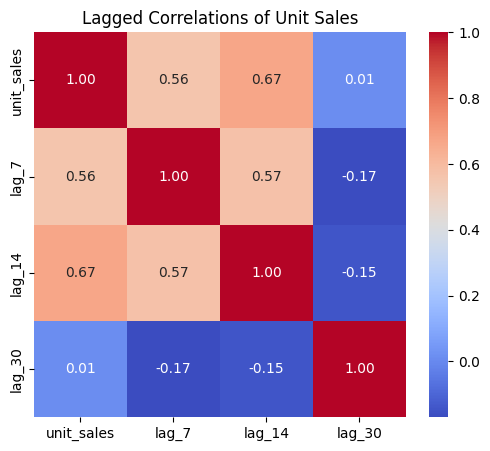

In [45]:
# Step 2 — Calculate Correlations
import seaborn as sns
correlations = daily_sales_df.corr()
# Step 3 — Visualize Lagged Correlations
plt.figure(figsize=(6,5))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Lagged Correlations of Unit Sales")
plt.show()


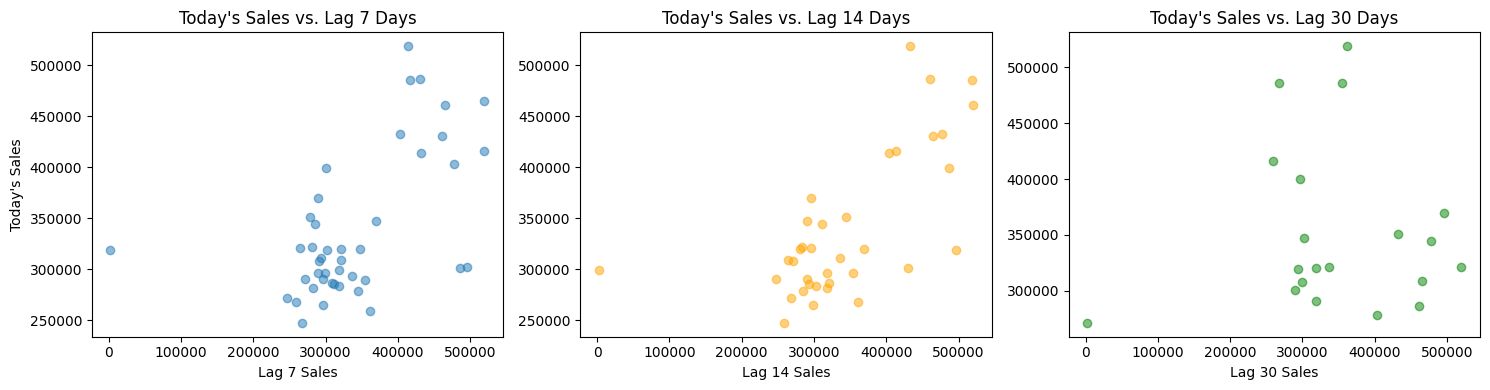

In [46]:
# Step 4 — Scatter Plots to Visualize Relationships
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.scatter(daily_sales_df['lag_7'], daily_sales_df['unit_sales'], alpha=0.5)
plt.title("Today's Sales vs. Lag 7 Days")
plt.xlabel("Lag 7 Sales")
plt.ylabel("Today's Sales")

plt.subplot(1,3,2)
plt.scatter(daily_sales_df['lag_14'], daily_sales_df['unit_sales'], alpha=0.5, color="orange")
plt.title("Today's Sales vs. Lag 14 Days")
plt.xlabel("Lag 14 Sales")

plt.subplot(1,3,3)
plt.scatter(daily_sales_df['lag_30'], daily_sales_df['unit_sales'], alpha=0.5, color="green")
plt.title("Today's Sales vs. Lag 30 Days")
plt.xlabel("Lag 30 Sales")

plt.tight_layout()
plt.show()


**Purpose:**  
This section explores the relationship between current sales and past sales (lagged features), which is crucial for time series forecasting.

**What was done:**  
- Created lagged features: sales from 7, 14, and 30 days ago.
- Calculated correlations between today's sales and these lagged values.
- Visualized correlations with a heatmap and scatter plots.

**Insights:**
- The correlation matrix and heatmap show that there is a **positive correlation** between current sales and sales from previous weeks (especially lag 7), indicating that past sales are predictive of future sales.
- The scatter plots confirm this relationship: higher sales in the past week(s) generally correspond to higher sales today, though there is some spread due to noise and seasonality.
- **Lagged features** (such as sales from 7, 14, and 30 days ago) are valuable predictors and should be included in forecasting models.


# 8) Feature Engineering Checks (during EDA)

Explore Categorical Encodings: See whether encoded categorical variables (e.g., families, locations) cluster meaningfully.

Label Encode Categorical Columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
le_family = LabelEncoder()
dataset['family_encoded'] = le_family.fit_transform(dataset['family'])

le_city = LabelEncoder()
dataset['city_encoded'] = le_city.fit_transform(dataset['city'])

le_state = LabelEncoder()
dataset['state_encoded'] = le_state.fit_transform(dataset['state'])

le_type = LabelEncoder()
dataset['type_encoded'] = le_type.fit_transform(dataset['type'])


Correlation Heatmap of Encoded Categories

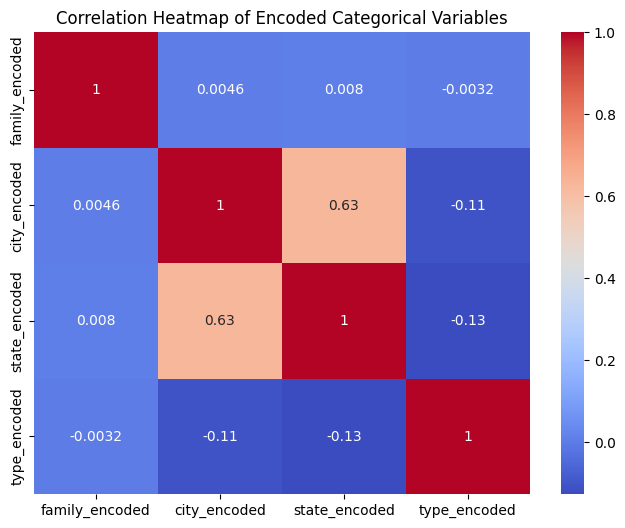

In [48]:
plt.figure(figsize=(8,6))
sns.heatmap(
    dataset[['family_encoded','city_encoded','state_encoded','type_encoded']].corr(),
    annot=True, cmap="coolwarm"
)
plt.title("Correlation Heatmap of Encoded Categorical Variables")
plt.show()


## Feature Engineering Checks: Encoded Categorical Variables

- The correlation heatmap of label-encoded features (`family`, `city`, `state`, `type`) shows that these variables are largely independent, with low linear correlations between them.
- No strong linear relationship exists between store type, product family, city, or state after encoding, which means there is minimal risk of multicollinearity if all are included as features in predictive models.

**Recommendation:**  
- Keep all encoded categorical features for modeling.
- No further action is needed regarding multicollinearity at this stage, but consider more advanced encoding (e.g., target or one-hot encoding) for specific model types.


# `EDA Summary & Recommendations for Preprocessing Team`

## 1. Data Quality Checks
- **Missing Values:** No missing values detected in the dataset.
- **Duplicates:** No duplicate records found.
- **Recommendation:** No imputation or deduplication required at this stage.

## 2. Sales Distribution & Outliers
- **Sales are highly skewed** with many small values and a few very large ones.
- **Log transformation** of `unit_sales` reduces skewness and stabilizes variance, making the data more suitable for modeling.
- **Outliers:** Extreme sales values exist and likely represent real events (e.g., promotions, holidays). Do **not** remove these automatically.
- **Recommendation:** Use log-transformed sales for modeling. Retain outliers, but consider flagging them for potential feature engineering.

## 3. Returns/Refunds Analysis
- **Negative sales (returns/refunds) are present** and are more frequent in certain store types (notably `[D]`) and for promotional items.
- **Recommendation:** Engineer a feature to flag returns/refunds. Consider analyzing returns separately, as they may influence demand forecasting and inventory management.

## 4. Time Series Exploration
- **weekly, and monthly aggregations** reveal different patterns:
    - **Weekly:** Smoother, reveals regular cycles (e.g., weekends).
    - **Monthly:** Highlights seasonality and long-term trends.
    - **7-day rolling average:** Smooths daily data for clearer short-term trends.
- **Recommendation:** Retain all time aggregations for feature engineering. Use rolling averages and extract seasonality features for modeling.

## 5. Store & Regional Analysis
- **Sales are concentrated in a few states and store types.**
- **Store type `[D]` has the highest total sales,** but this may be due to more stores or larger stores. Average sales per store type provide a more nuanced view.
- **Recommendation:** Include store type, state, and city as categorical features. Normalize sales by store count/type for fair comparison. Engineer features for store-level performance.

## 6. Lagged Features & Correlations
- **Lagged sales features (7, 14, 30 days)** show positive correlation with current sales, confirming their predictive value for time series models.
- **Recommendation:** Include lagged sales features in modeling. Handle initial NaN values (from lagging) by dropping or imputing as appropriate.

## 7. Categorical Feature Encoding
- **Label encoding** of `family`, `city`, `state`, and `type` shows low correlation between these features, indicating minimal risk of multicollinearity.
- **Recommendation:** Keep all encoded categorical features. For some models, consider more advanced encoding (e.g., one-hot or target encoding).